In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab import files

uploaded = files.upload()

Saving 202501_기준금속.xlsx to 202501_기준금속.xlsx


In [2]:
# 데이터 불러오기
df = pd.read_excel('202501_기준금속.xlsx')

In [3]:
# 날짜 컬럼 datetime 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'], errors='coerce')

In [6]:
# 금속 컬럼 추출 (ng/m3)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

In [8]:
# 금속 음수값 Nan 처리
df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)

/tmp/ipython-input-2460336799.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)


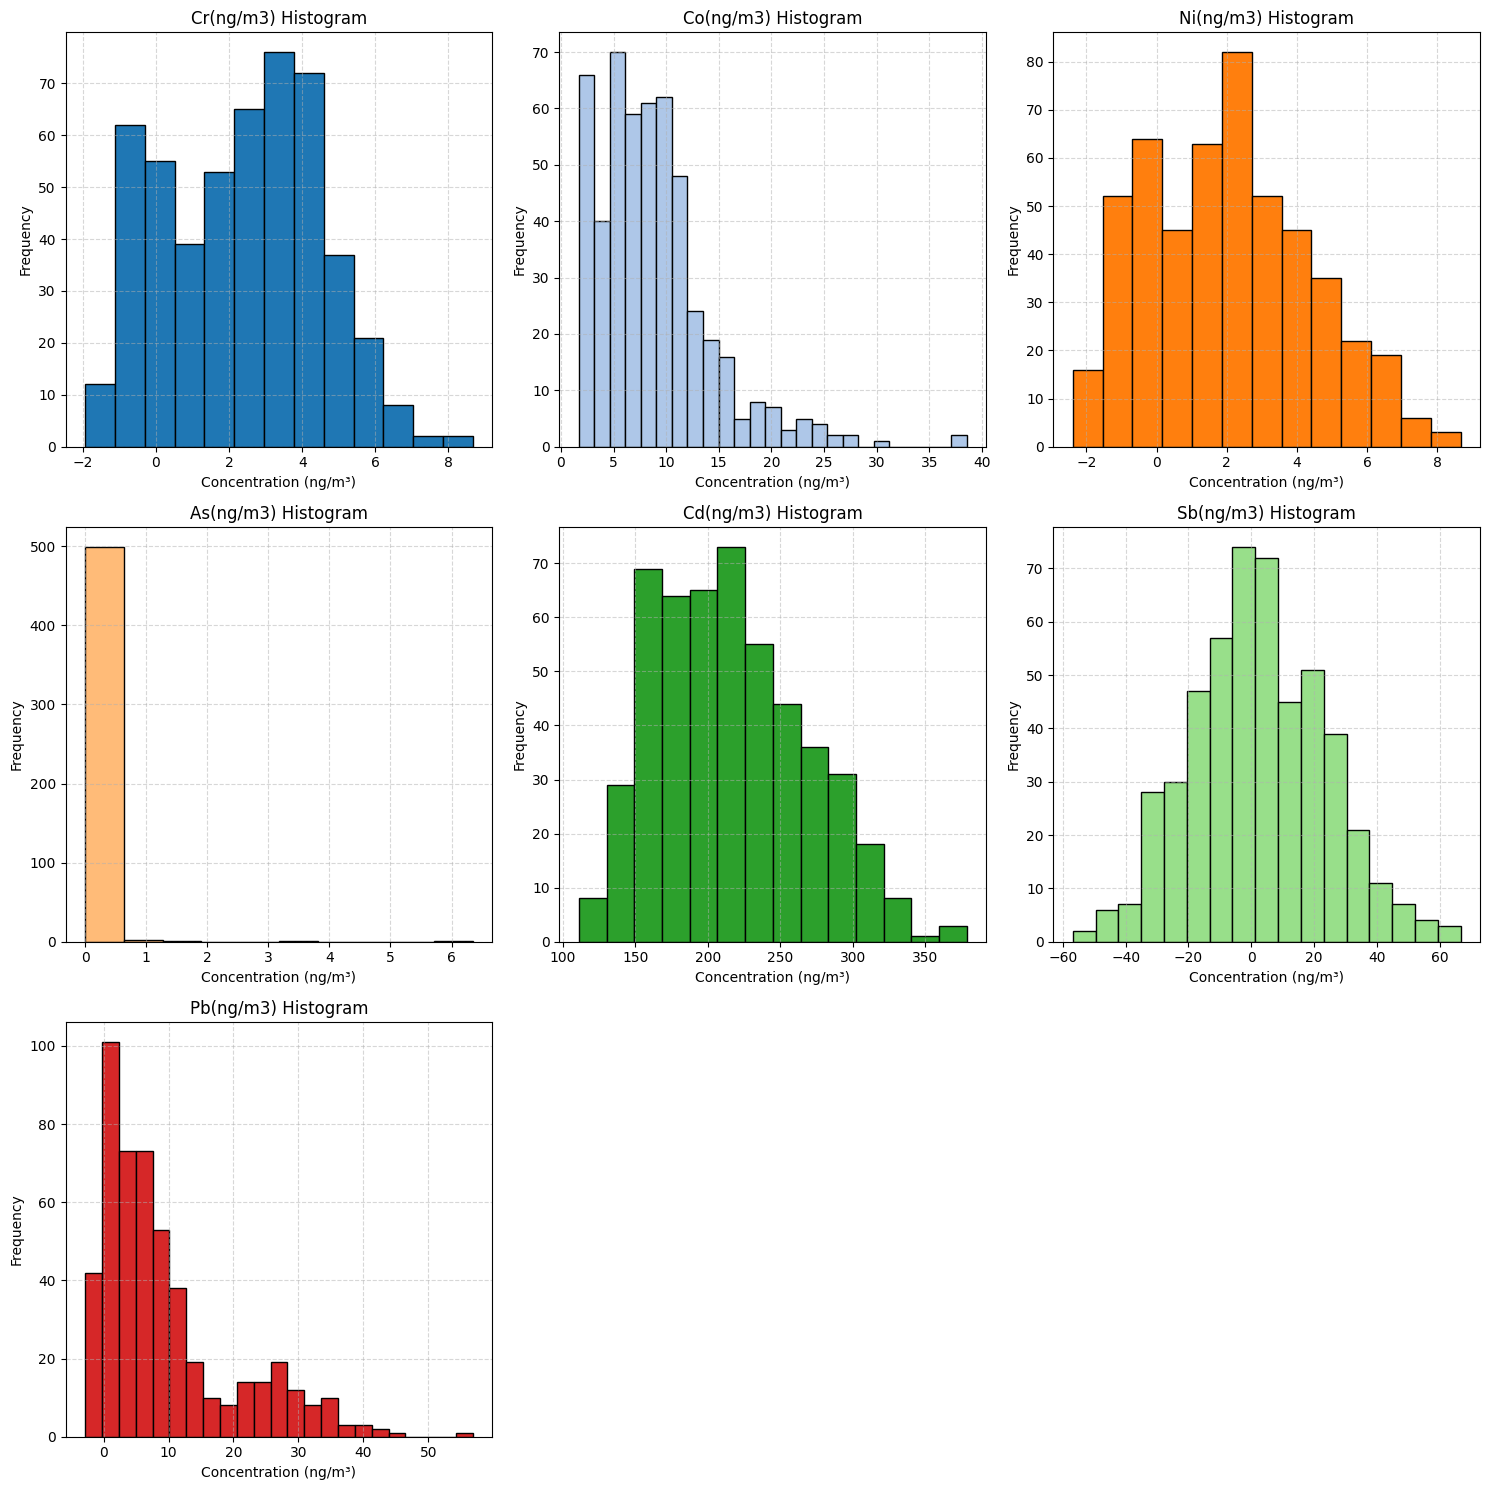

In [7]:
# 히스토그램 생성 전 설정
num_metals = len(metal_columns) # 금속 개수
cols = 3 # subplot 열 개수
rows = math.ceil(num_metals / cols) # subplot 행 개수 계산
colors = plt.cm.tab20.colors # 색상 팔레트

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) # 전체 subplot 틀 생성
axes = axes.flatten()  # 반복문 단일 인덱스로 변경

# subplot 반복 생성
for idx, metal in enumerate(metal_columns):
    data = df[metal].dropna()

    # 유효한 값이 1개 이하이거나, 모두 같은 값인 경우 (예: 전부 0)
    if data.nunique() <= 1:
        axes[idx].axis('off') # x, y축 off
        axes[idx].text(0.5, 0.5, f'{metal}\nNo meaningful data',
                       horizontalalignment='center',
                       verticalalignment='center',
                       fontsize=15,
                       transform=axes[idx].transAxes,
                       bbox=dict(facecolor='lightgray', edgecolor='gray'))
        continue

    color_idx = idx % len(colors)  # 색상 순환 사용
    axes[idx].hist(df[metal].dropna(), # 히스토그램 생성
                   bins='auto', # bin 개수 자동 설정
                   edgecolor='black',
                   color=colors[color_idx])
    axes[idx].set_title(f"{metal} Histogram")
    axes[idx].set_xlabel("Concentration (ng/m³)")
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True, linestyle='--', alpha=0.5)

# 남는 subplot 칸은 숨김 처리
for ax in axes[num_metals:]:
    ax.set_visible(False)

# 그래프 출력
plt.tight_layout()
plt.show()